In [4]:
using Revise
using Bilevel

using RigidBodyDynamics
using MeshCatMechanisms
using MeshCat
using ForwardDiff
using Plots
using LinearAlgebra
using StaticArrays
using Base.Threads

In [2]:
nthreads()

16

In [3]:
urdf = joinpath("..", "urdf", "ball.urdf")
mechanism = parse_urdf(Float64, urdf)

floor = findbody(mechanism, "floor")
point = Point3D(default_frame(floor), SVector([0.,0.,0.]...))
normal = FreeVector3D(default_frame(floor), SVector([0.,0.,1.]...))
floor_obs = Obstacle(floor, point, normal, :xyz, .5)

obstacles = [floor_obs]
env = Environment(mechanism, urdf, obstacles)
ctrl! = (u,t,x) -> u[:] .= 0.
x0 = MechanismState(mechanism)
Δt = .01

0.01

In [5]:
q1 = [1., 0., 0., 0., 0., 0., 0.017]
v1 = [0., 0., 0., 1., 0., 0.]
N = 25

25

In [9]:
sim_data_indirect = get_sim_data_indirect(mechanism,env,Δt,relax_comp=false)
set_configuration!(x0, q1)
set_velocity!(x0, v1)
traj_indirect = Bilevel.simulate(sim_data_indirect, ctrl!, x0, N, verbose=1)

Finished successfully: optimality conditions satisfied
Finished successfully: optimality conditions satisfied
Finished successfully: optimality conditions satisfied
Finished successfully: optimality conditions satisfied
Finished successfully: optimality conditions satisfied
Finished successfully: optimality conditions satisfied
Finished successfully: optimality conditions satisfied
Finished successfully: optimality conditions satisfied
Finished successfully: optimality conditions satisfied
Finished successfully: optimality conditions satisfied
Finished successfully: optimality conditions satisfied
Finished successfully: optimality conditions satisfied
Finished successfully: optimality conditions satisfied
Finished successfully: optimality conditions satisfied
Finished successfully: optimality conditions satisfied
Finished successfully: optimality conditions satisfied
Finished successfully: optimality conditions satisfied
Finished successfully: optimality conditions satisfied
Finished s

(Array{Float64,1}[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.017], [1.0, 0.0, 1.46186e-10, -6.97934e-25, 0.01, -1.41364e-26, 0.016019], [1.0, 0.0, 4.45811e-10, -6.97934e-25, 0.02, -1.41364e-26, 0.014057], [1.0, 0.0, 9.18338e-10, -6.97934e-25, 0.03, -1.41364e-26, 0.011114], [1.0, 0.0, 1.60738e-9, -6.97934e-25, 0.04, -1.41364e-26, 0.00719], [1.0, 0.0, 2.62888e-9, -6.97934e-25, 0.05, -1.41364e-26, 0.002285], [1.0, -7.57036e-21, 3.6508e-9, 9.95264e-21, 0.0581995, 1.5613e-23, 5.07349e-8], [1.0, -7.57036e-21, 2.5933e-5, 9.95264e-21, 0.0647658, 1.5613e-23, 1.93701e-14], [1.0, -7.57036e-21, 0.000292603, 9.95264e-21, 0.0708415, 1.5613e-23, 1.93701e-14], [1.0, -7.57036e-21, 0.000559136, 9.95264e-21, 0.0764266, 1.5613e-23, 1.93701e-14]  …  [0.999997, -7.57036e-21, 0.00215551, 9.95262e-21, 0.0996338, 1.56128e-23, 1.93701e-14], [0.999997, -7.57036e-21, 0.00242112, 9.95262e-21, 0.101784, 1.56129e-23, 1.93701e-14], [0.999996, -7.57036e-21, 0.00268659, 9.95259e-21, 0.103444, 1.56128e-23, 1.93701e-14], [0.999995

In [10]:
sim_data_direct = get_sim_data_direct(mechanism,env,Δt,relax_comp=false)
set_configuration!(x0, q1)
set_velocity!(x0, v1)
traj_direct = Bilevel.simulate(sim_data_direct, ctrl!, x0, N, verbose=1)

Finished successfully: optimality conditions satisfied
Finished successfully: optimality conditions satisfied
Finished successfully: optimality conditions satisfied
Finished successfully: optimality conditions satisfied
Finished successfully: optimality conditions satisfied
Finished successfully: optimality conditions satisfied
Finished successfully: optimality conditions satisfied
Finished successfully: optimality conditions satisfied
Finished successfully: optimality conditions satisfied
Finished successfully: optimality conditions satisfied
Finished successfully: optimality conditions satisfied
Finished successfully: optimality conditions satisfied
Finished successfully: optimality conditions satisfied
Finished successfully: optimality conditions satisfied
Finished successfully: optimality conditions satisfied
Finished successfully: optimality conditions satisfied
Finished successfully: optimality conditions satisfied
Finished successfully: optimality conditions satisfied
Finished s

(Any[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.017], [1.0, 0.0, 4.90389e-6, 0.0, 0.01, 0.0, 0.016019], [1.0, 0.0, 1.4711e-5, 0.0, 0.02, 0.0, 0.014057], [1.0, 0.0, 2.94207e-5, 0.0, 0.0300001, 0.0, 0.011114], [1.0, 0.0, 4.90322e-5, 0.0, 0.0400002, 0.0, 0.00719], [1.0, 0.0, 7.35446e-5, 0.0, 0.0500003, 0.0, 0.002285], [1.0, 0.0, 9.02541e-5, 0.0, 0.0582002, 0.0, -4.90249e-7], [1.0, 0.0, 0.000100259, 0.0, 0.0647668, 0.0, -2.74032e-7], [1.0, 0.0, 0.000110503, 0.0, 0.0708428, 0.0, -1.41203e-7], [1.0, 0.0, 0.000120987, 0.0, 0.0764285, 0.0, -1.34538e-7]  …  [1.0, 0.0, 0.000188929, 0.0, 0.0996426, 0.0, -8.46763e-8], [1.0, 0.0, 0.000201093, 0.0, 0.101795, 0.0, -7.47194e-8], [1.0, 0.0, 0.000213496, 0.0, 0.103457, 0.0, -6.4292e-8], [1.0, 0.0, 0.00022614, 0.0, 0.104628, 0.0, -5.33937e-8], [1.0, 0.0, 0.000239024, 0.0, 0.105309, 0.0, -4.20245e-8], [1.0, 0.0, 0.000252149, 0.0, 0.105499, 0.0, -3.01841e-8], [1.0, 0.0, 0.000265366, 0.0, 0.1055, -7.48664e-13, -9.99634e-9], [1.0, 0.0, 0.000278583, 0.0, 0.1055, 1.0735

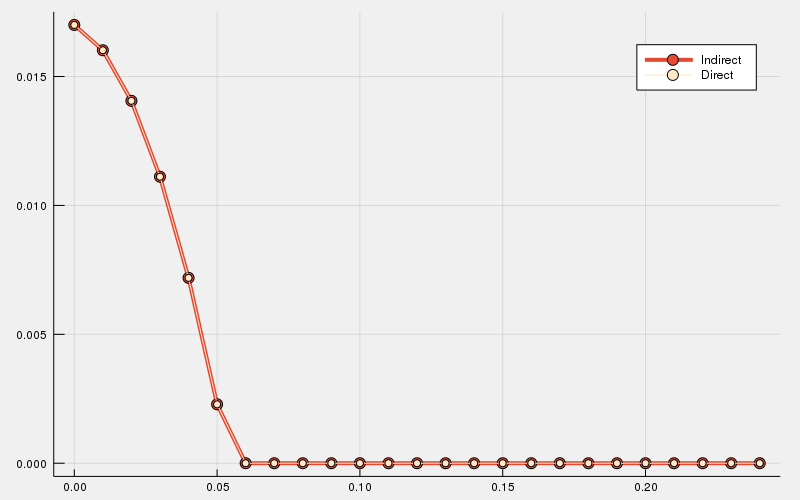

In [11]:
j = 7
clibrary(:Plots)
gr(size=(800,500), html_output_format=:png, 
    seriescolor=:magma,  background_color_legend=:white, 
    background=RGB(((240,240,240) ./ 255.)...));
plot(traj_indirect[6],traj_indirect[7][j,:],label="Indirect",seriescolor=RGB(((227,74,51) ./ 255.)...),linewidth=4,marker=6)
plot!(traj_direct[6],traj_direct[7][j,:],label="Direct",seriescolor=RGB(((254,232,200) ./ 255.)...),linewidth=0,marker=4)

In [13]:
q1 = [1., 0., 0., 0., 0., 0., 0.]
qN = [1., 0., 0., 0., .1, 0., 0.]
N = 10
Δt = .01

0.01

In [25]:
sim_data_indirect = get_trajopt_data_indirect(mechanism,env,Δt,N,relax_comp=false)

# adding user defined constraint
vs = sim_data_indirect.vs

add_eq!(sim_data_indirect, :cq1, length(q1), x -> vs(x, :q1) - q1)
add_eq!(sim_data_indirect, :cqN, length(qN), x -> vs(x, Symbol("q", N)) - qN)

add_box_con!(sim_data_indirect, :u, :u, zeros(num_velocities(mechanism)), zeros(num_velocities(mechanism)), 1:N-1)
add_box_con!(sim_data_indirect, :hbox, :h, [.005], [.01], 1:N-1)

for i=1:N
    add_ineq!(sim_data_indirect, Symbol("height",i), 1, x -> vs(x, Symbol("q",i))[7] - .001)
end

for i=1:N-1
    add_obj!(sim_data_indirect, Symbol("v",i), x -> vs(x, Symbol("h",i))[1]*vs(x, Symbol("v",i))'*vs(x, Symbol("v",i)))
end
add_obj!(sim_data_indirect, Symbol("v",N), x -> vs(x, Symbol("v",N))'*vs(x, Symbol("v",N)))

10-element Array{Tuple{Symbol,Any},1}:
 (:v1, getfield(Main, Symbol("##63#64")){Int64}(1))
 (:v2, getfield(Main, Symbol("##63#64")){Int64}(2))
 (:v3, getfield(Main, Symbol("##63#64")){Int64}(3))
 (:v4, getfield(Main, Symbol("##63#64")){Int64}(4))
 (:v5, getfield(Main, Symbol("##63#64")){Int64}(5))
 (:v6, getfield(Main, Symbol("##63#64")){Int64}(6))
 (:v7, getfield(Main, Symbol("##63#64")){Int64}(7))
 (:v8, getfield(Main, Symbol("##63#64")){Int64}(8))
 (:v9, getfield(Main, Symbol("##63#64")){Int64}(9))
 (:v10, getfield(Main, Symbol("##65#66"))())       

In [26]:
traj_indirect = Bilevel.trajopt(sim_data_indirect, quaternion_state=true, verbose=1)


Error thrown in threaded loop on thread 8: BoundsError(a=Array{RigidBodyDynamics.RigidBody{Float64}, (2,)}[
  RigidBodyDynamics.RigidBody{Float64}(name="floor", inertia=RigidBodyDynamics.Spatial.SpatialInertia{Float64}(frame=RigidBodyDynamics.Spatial.CartesianFrame3D(id=3), moment=StaticArrays.SArray{Tuple{3, 3}, Float64, 2, 9}(data=(0, 0, 0, 0, 0, 0, 0, 0, 0)), cross_part=StaticArrays.SArray{Tuple{3}, Float64, 1, 3}(data=(0, 0, 0)), mass=0), frame_definitions=Array{RigidBodyDynamics.Spatial.Transform3D{Float64}, (3,)}[RigidBodyDynamics.Spatial.Transform3D{Float64}(mat=StaticArrays.SArray{Tuple{4, 4}, Float64, 2, 16}(data=(1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1)), from=RigidBodyDynamics.Spatial.CartesianFrame3D(id=1), to=RigidBodyDynamics.Spatial.CartesianFrame3D(id=3)), RigidBodyDynamics.Spatial.Transform3D{Float64}(mat=StaticArrays.SArray{Tuple{4, 4}, Float64, 2, 16}(data=(1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1)), from=RigidBodyDynamics.Spatial.CartesianFrame3D(id=3)

Terminated after numerical difficulties: singular basis


{Float64}, RigidBodyDynamics.Contact.ViscoelasticCoulombModel{Float64}}}, (0,)}[], id=RigidBodyDynamics.BodyID(value=1)),
  RigidBodyDynamics.RigidBody{Float64}(name="floor", inertia=RigidBodyDynamics.Spatial.SpatialInertia{Float64}(frame=RigidBodyDynamics.Spatial.CartesianFrame3D(id=3), moment=StaticArrays.SArray{Tuple{3, 3}, Float64, 2, 9}(data=(0, 0, 0, 0, 0, 0, 0, 0, 0)), cross_part=StaticArrays.SArray{Tuple{3}, Float64, 1, 3}(data=(0, 0, 0)), mass=0), frame_definitions=Array{RigidBodyDynamics.Spatial.Transform3D{Float64}, (3,)}[RigidBodyDynamics.Spatial.Transform3D{Float64}(mat=StaticArrays.SArray{Tuple{4, 4}, Float64, 2, 16}(data=(1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1)), from=RigidBodyDynamics.Spatial.CartesianFrame3D(id=1), to=RigidBodyDynamics.Spatial.CartesianFrame3D(id=3)), RigidBodyDynamics.Spatial.Transform3D{Float64}(mat=StaticArrays.SArray{Tuple{4, 4}, Float64, 2, 16}(data=(1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1)), from=RigidBodyDynamics.Spatial.Cartesian

  RigidBodyDynamics.RigidBody{Float64}(name="world", inertia=nothing, frame_definitions=Array{RigidBodyDynamics.Spatial.Transform3D{Float64}, (2,)}[RigidBodyDynamics.Spatial.Transform3D{Float64}(mat=StaticArrays.SArray{Tuple{4, 4}, Float64, 2, 16}(data=(1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1)), from=RigidBodyDynamics.Spatial.CartesianFrame3D(id=0), to=RigidBodyDynamics.Spatial.CartesianFrame3D(id=0)), RigidBodyDynamics.Spatial.Transform3D{Float64}(mat=StaticArrays.SArray{Tuple{4, 4}, Float64, 2, 16}(data=(1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1)), from=RigidBodyDynamics.Spatial.CartesianFrame3D(id=2), to=RigidBodyDynamics.Spatial.CartesianFrame3D(id=0))], contact_points=Array{RigidBodyDynamics.Contact.ContactPoint{Float64, RigidBodyDynamics.Contact.SoftContactModel{RigidBodyDynamics.Contact.HuntCrossleyModel{Float64}, RigidBodyDynamics.Contact.ViscoelasticCoulombModel{Float64}}}, (0,)}[], id=RigidBodyDynamics.BodyID(value=1)),
  RigidBodyDynamics.RigidBody{Float64}(name=

  RigidBodyDynamics.RigidBody{Float64}(name="world", inertia=nothing, frame_definitions=Array{RigidBodyDynamics.Spatial.Transform3D{Float64}, (2,)}[RigidBodyDynamics.Spatial.Transform3D{Float64}(mat=StaticArrays.SArray{Tuple{4, 4}, Float64, 2, 16}(data=(1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1)), from=RigidBodyDynamics.Spatial.CartesianFrame3D(id=0), to=RigidBodyDynamics.Spatial.CartesianFrame3D(id=0)), RigidBodyDynamics.Spatial.Transform3D{Float64}(mat=StaticArrays.SArray{Tuple{4, 4}, Float64, 2, 16}(data=(1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1)), from=RigidBodyDynamics.Spatial.CartesianFrame3D(id=2), to=RigidBodyDynamics.Spatial.CartesianFrame3D(id=0))], contact_points=Array{RigidBodyDynamics.Contact.ContactPoint{Float64, RigidBodyDynamics.Contact.SoftContactModel{RigidBodyDynamics.Contact.HuntCrossleyModel{Float64}, RigidBodyDynamics.Contact.ViscoelasticCoulombModel{Float64}}}, (0,)}[], id=RigidBodyDynamics.BodyID(value=1)),
  RigidBodyDynamics.RigidBody{Float64}(name=

  RigidBodyDynamics.RigidBody{Float64}(name="world", inertia=nothing, frame_definitions=Array{RigidBodyDynamics.Spatial.Transform3D{Float64}, (2,)}[RigidBodyDynamics.Spatial.Transform3D{Float64}(mat=StaticArrays.SArray{Tuple{4, 4}, Float64, 2, 16}(data=(1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1)), from=RigidBodyDynamics.Spatial.CartesianFrame3D(id=0), to=RigidBodyDynamics.Spatial.CartesianFrame3D(id=0)), RigidBodyDynamics.Spatial.Transform3D{Float64}(mat=StaticArrays.SArray{Tuple{4, 4}, Float64, 2, 16}(data=(1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1)), from=RigidBodyDynamics.Spatial.CartesianFrame3D(id=2), to=RigidBodyDynamics.Spatial.CartesianFrame3D(id=0))], contact_points=Array{RigidBodyDynamics.Contact.ContactPoint{Float64, RigidBodyDynamics.Contact.SoftContactModel{RigidBodyDynamics.Contact.HuntCrossleyModel{Float64}, RigidBodyDynamics.Contact.ViscoelasticCoulombModel{Float64}}}, (0,)}[], id=RigidBodyDynamics.BodyID(value=1)),
  RigidBodyDynamics.RigidBody{Float64}(name=

  RigidBodyDynamics.RigidBody{Float64}(name="world", inertia=nothing, frame_definitions=Array{RigidBodyDynamics.Spatial.Transform3D{Float64}, (2,)}[RigidBodyDynamics.Spatial.Transform3D{Float64}(mat=StaticArrays.SArray{Tuple{4, 4}, Float64, 2, 16}(data=(1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1)), from=RigidBodyDynamics.Spatial.CartesianFrame3D(id=0), to=RigidBodyDynamics.Spatial.CartesianFrame3D(id=0)), RigidBodyDynamics.Spatial.Transform3D{Float64}(mat=StaticArrays.SArray{Tuple{4, 4}, Float64, 2, 16}(data=(1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1)), from=RigidBodyDynamics.Spatial.CartesianFrame3D(id=2), to=RigidBodyDynamics.Spatial.CartesianFrame3D(id=0))], contact_points=Array{RigidBodyDynamics.Contact.ContactPoint{Float64, RigidBodyDynamics.Contact.SoftContactModel{RigidBodyDynamics.Contact.HuntCrossleyModel{Float64}, RigidBodyDynamics.Contact.ViscoelasticCoulombModel{Float64}}}, (0,)}[], id=RigidBodyDynamics.BodyID(value=1)),
  RigidBodyDynamics.RigidBody{Float64}(name=

  RigidBodyDynamics.RigidBody{Float64}(name="world", inertia=nothing, frame_definitions=Array{RigidBodyDynamics.Spatial.Transform3D{Float64}, (2,)}[RigidBodyDynamics.Spatial.Transform3D{Float64}(mat=StaticArrays.SArray{Tuple{4, 4}, Float64, 2, 16}(data=(1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1)), from=RigidBodyDynamics.Spatial.CartesianFrame3D(id=0), to=RigidBodyDynamics.Spatial.CartesianFrame3D(id=0)), RigidBodyDynamics.Spatial.Transform3D{Float64}(mat=StaticArrays.SArray{Tuple{4, 4}, Float64, 2, 16}(data=(1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1)), from=RigidBodyDynamics.Spatial.CartesianFrame3D(id=2), to=RigidBodyDynamics.Spatial.CartesianFrame3D(id=0))], contact_points=Array{RigidBodyDynamics.Contact.ContactPoint{Float64, RigidBodyDynamics.Contact.SoftContactModel{RigidBodyDynamics.Contact.HuntCrossleyModel{Float64}, RigidBodyDynamics.Contact.ViscoelasticCoulombModel{Float64}}}, (0,)}[], id=RigidBodyDynamics.BodyID(value=1)),
  RigidBodyDynamics.RigidBody{Float64}(name=

  RigidBodyDynamics.RigidBody{Float64}(name="world", inertia=nothing, frame_definitions=Array{RigidBodyDynamics.Spatial.Transform3D{Float64}, (2,)}[RigidBodyDynamics.Spatial.Transform3D{Float64}(mat=StaticArrays.SArray{Tuple{4, 4}, Float64, 2, 16}(data=(1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1)), from=RigidBodyDynamics.Spatial.CartesianFrame3D(id=0), to=RigidBodyDynamics.Spatial.CartesianFrame3D(id=0)), RigidBodyDynamics.Spatial.Transform3D{Float64}(mat=StaticArrays.SArray{Tuple{4, 4}, Float64, 2, 16}(data=(1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1)), from=RigidBodyDynamics.Spatial.CartesianFrame3D(id=2), to=RigidBodyDynamics.Spatial.CartesianFrame3D(id=0))], contact_points=Array{RigidBodyDynamics.Contact.ContactPoint{Float64, RigidBodyDynamics.Contact.SoftContactModel{RigidBodyDynamics.Contact.HuntCrossleyModel{Float64}, RigidBodyDynamics.Contact.ViscoelasticCoulombModel{Float64}}}, (0,)}[], id=RigidBodyDynamics.BodyID(value=1)),
  RigidBodyDynamics.RigidBody{Float64}(name=

  RigidBodyDynamics.RigidBody{Float64}(name="world", inertia=nothing, frame_definitions=Array{RigidBodyDynamics.Spatial.Transform3D{Float64}, (2,)}[RigidBodyDynamics.Spatial.Transform3D{Float64}(mat=StaticArrays.SArray{Tuple{4, 4}, Float64, 2, 16}(data=(1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1)), from=RigidBodyDynamics.Spatial.CartesianFrame3D(id=0), to=RigidBodyDynamics.Spatial.CartesianFrame3D(id=0)), RigidBodyDynamics.Spatial.Transform3D{Float64}(mat=StaticArrays.SArray{Tuple{4, 4}, Float64, 2, 16}(data=(1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1)), from=RigidBodyDynamics.Spatial.CartesianFrame3D(id=2), to=RigidBodyDynamics.Spatial.CartesianFrame3D(id=0))], contact_points=Array{RigidBodyDynamics.Contact.ContactPoint{Float64, RigidBodyDynamics.Contact.SoftContactModel{RigidBodyDynamics.Contact.HuntCrossleyModel{Float64}, RigidBodyDynamics.Contact.ViscoelasticCoulombModel{Float64}}}, (0,)}[], id=RigidBodyDynamics.BodyID(value=1)),
  RigidBodyDynamics.RigidBody{Float64}(name=

  RigidBodyDynamics.RigidBody{Float64}(name="world", inertia=nothing, frame_definitions=Array{RigidBodyDynamics.Spatial.Transform3D{Float64}, (2,)}[RigidBodyDynamics.Spatial.Transform3D{Float64}(mat=StaticArrays.SArray{Tuple{4, 4}, Float64, 2, 16}(data=(1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1)), from=RigidBodyDynamics.Spatial.CartesianFrame3D(id=0), to=RigidBodyDynamics.Spatial.CartesianFrame3D(id=0)), RigidBodyDynamics.Spatial.Transform3D{Float64}(mat=StaticArrays.SArray{Tuple{4, 4}, Float64, 2, 16}(data=(1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1)), from=RigidBodyDynamics.Spatial.CartesianFrame3D(id=2), to=RigidBodyDynamics.Spatial.CartesianFrame3D(id=0))], contact_points=Array{RigidBodyDynamics.Contact.ContactPoint{Float64, RigidBodyDynamics.Contact.SoftContactModel{RigidBodyDynamics.Contact.HuntCrossleyModel{Float64}, RigidBodyDynamics.Contact.ViscoelasticCoulombModel{Float64}}}, (0,)}[], id=RigidBodyDynamics.BodyID(value=1)),
  RigidBodyDynamics.RigidBody{Float64}(name=

  RigidBodyDynamics.RigidBody{Float64}(name="floor", inertia=RigidBodyDynamics.Spatial.SpatialInertia{Float64}(frame=RigidBodyDynamics.Spatial.CartesianFrame3D(id=3), moment=StaticArrays.SArray{Tuple{3, 3}, Float64, 2, 9}(data=(0, 0, 0, 0, 0, 0, 0, 0, 0)), cross_part=StaticArrays.SArray{Tuple{3}, Float64, 1, 3}(data=(0, 0, 0)), mass=0), frame_definitions=Array{RigidBodyDynamics.Spatial.Transform3D{Float64}, (3,)}[RigidBodyDynamics.Spatial.Transform3D{Float64}(mat=StaticArrays.SArray{Tuple{4, 4}, Float64, 2, 16}(data=(1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1)), from=RigidBodyDynamics.Spatial.CartesianFrame3D(id=1), to=RigidBodyDynamics.Spatial.CartesianFrame3D(id=3)), RigidBodyDynamics.Spatial.Transform3D{Float64}(mat=StaticArrays.SArray{Tuple{4, 4}, Float64, 2, 16}(data=(1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1)), from=RigidBodyDynamics.Spatial.CartesianFrame3D(id=3), to=RigidBodyDynamics.Spatial.CartesianFrame3D(id=3)), RigidBodyDynamics.Spatial.Transform3D{Float64}(mat=St

(Array{Float64,1}[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]], Array{Float64,1}[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]], Array{Float64,1}[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 

In [21]:
sim_data_direct = get_trajopt_data_direct(mechanism,env,Δt,N,relax_comp=false)

# adding user defined constraint
vs = sim_data_direct.vs

add_eq!(sim_data_direct, :cq1, length(q1), x -> vs(x, :q1) - q1)
add_eq!(sim_data_direct, :cqN, length(qN), x -> vs(x, Symbol("q", N)) - qN)

add_box_con!(sim_data_direct, :u, :u, zeros(num_velocities(mechanism)), zeros(num_velocities(mechanism)), 1:N-1)
add_box_con!(sim_data_direct, :hbox, :h, [.005], [.01], 1:N-1)

for i=1:N
    add_ineq!(sim_data_direct, Symbol("height",i), 1, x -> vs(x, Symbol("q",i))[7] - .001)
end

# for i=1:N-1
#     add_obj!(sim_data_direct, Symbol("v",i), x -> vs(x, Symbol("h",i))[1]*vs(x, Symbol("v",i))'*vs(x, Symbol("v",i)))
# end
# add_obj!(sim_data_direct, Symbol("v",N), x -> vs(x, Symbol("v",N))'*vs(x, Symbol("v",N)));

In [22]:
traj_direct = Bilevel.trajopt(sim_data_direct, quaternion_state=true, verbose=1)

ArgumentError: ArgumentError: invalid index: ForwardDiff.Dual{ForwardDiff.Tag{getfield(Bilevel, Symbol("#eval_cons#54")){SimData,Int64,Bilevel.VariableSelector,Bilevel.ConstraintSelector,Int64,Int64,Bool},Float64},Float64,12} of type DataType

In [31]:
sim_data_semidirect = get_trajopt_data_semidirect(mechanism,env,Δt,N,relax_comp=false)

# adding user defined constraint
vs = sim_data_semidirect.vs

add_eq!(sim_data_semidirect, :cq1, length(q1), x -> vs(x, :q1) - q1)
add_eq!(sim_data_semidirect, :cqN, length(qN), x -> vs(x, Symbol("q", N)) - qN)

add_box_con!(sim_data_semidirect, :u, :u, zeros(num_velocities(mechanism)), zeros(num_velocities(mechanism)), 1:N-1)
add_box_con!(sim_data_semidirect, :hbox, :h, [.005], [.01], 1:N-1)

for i=1:N
    add_ineq!(sim_data_semidirect, Symbol("height",i), 1, x -> vs(x, Symbol("q",i))[7] - .001)
end

for i=1:N-1
    add_obj!(sim_data_semidirect, Symbol("v",i), x -> vs(x, Symbol("h",i))[1]*vs(x, Symbol("v",i))'*vs(x, Symbol("v",i)))
#     add_obj!(sim_data_semidirect, Symbol("q",i), x -> vs(x, Symbol("q",i))[7])
end
add_obj!(sim_data_semidirect, Symbol("v",N), x -> vs(x, Symbol("v",N))'*vs(x, Symbol("v",N)));

In [32]:
traj_semidirect = Bilevel.trajopt(sim_data_semidirect, quaternion_state=true, verbose=1)

The problem appears to be infeasible: nonlinear infeasibilities minimized


(Any[[1.0, 0.0, 0.0, 0.0, 0.0, 2.09147e-13, 0.0], [1.0, 0.0, 1.13941e-5, 0.0, 0.0192824, 1.4609e-13, 0.0], [1.0, 0.0, 1.56814e-5, 0.0, 0.0380743, 1.2032e-13, 0.0], [1.0, 0.0, 1.88084e-5, 0.0, 0.0469209, 9.97168e-14, 0.000853625], [1.0, 0.0, 2.0048e-5, 0.0, 0.0557674, 1.03867e-13, 0.000636875], [1.0, 0.0, 2.0048e-5, 0.0, 0.0646139, 5.2248e-14, 0.001], [1.0, 0.0, 1.68582e-5, 0.0, 0.0734604, 3.17113e-14, 0.00111787], [1.0, 0.0, 9.30355e-6, 0.0, 0.082307, -2.01535e-15, 0.0009905], [1.0, 0.0, 1.65314e-6, 0.0, 0.0911535, 0.0, 0.000617875], [1.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0]], Any[[0.0, 0.0, 0.0, 1.92824, 5.25412e-13, 0.0981], [0.0, 0.00227883, 0.0, 1.92824, 2.61121e-13, 4.39413e-5], [0.0, 0.000857458, 0.0, 1.87919, 4.18895e-13, 5.89369e-5], [0.0, 0.00125077, 0.0, 1.7693, 6.93433e-13, 0.170792], [0.0, 0.000495864, 0.0, 1.7693, 5.46135e-13, 0.121746], [0.0, 0.0, 0.0, 1.7693, 4.3571e-13, 0.0726959], [0.0, -0.00127593, 0.0, 1.7693, 2.38419e-14, 0.0236347], [0.0, -0.00302187, 0.0, 1.7693, 8.1103

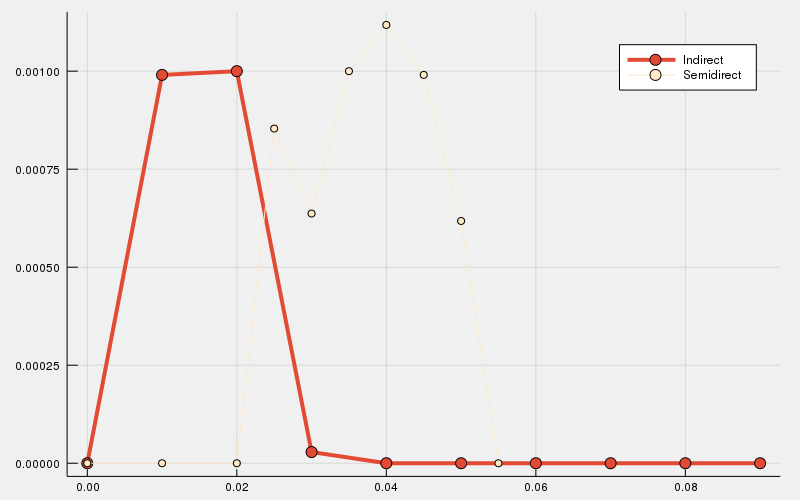

In [33]:
j = 7
clibrary(:Plots)
gr(size=(800,500), html_output_format=:png, 
    seriescolor=:magma,  background_color_legend=:white, 
    background=RGB(((240,240,240) ./ 255.)...));
plot(traj_indirect[7],traj_indirect[8][j,:],label="Indirect",seriescolor=RGB(((227,74,51) ./ 255.)...),linewidth=4,marker=6)
# plot!(traj_direct[7],traj_direct[8][j,:],label="Direct",seriescolor=RGB(((254,232,200) ./ 255.)...),linewidth=0,marker=4)
plot!(traj_semidirect[7],traj_semidirect[8][j,:],label="Semidirect",seriescolor=RGB(((254,232,200) ./ 255.)...),linewidth=0,marker=4)